In [ ]:
from ultralytics import YOLO
from huggingface_hub import snapshot_download
from pathlib import Path
import glob, os
import cv2
import numpy as np
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns



# Rutas base 
BASE_DIR = Path(r"C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final")
DATASETS_DIR = BASE_DIR / "Datasets"
MODELS_DIR = BASE_DIR / "Models"

MODELS_DIR.mkdir(exist_ok=True)

# Descargo modelo hf y yolov8

In [ ]:
local_dir = snapshot_download(repo_id="uisikdag/yolo-v8-football-players-detection")

weights = list(Path(local_dir).rglob("*.pt"))
print("Pesos encontrados:", weights)

# guardamos el modelo principal en MODELS_DIR
hf_model_path = MODELS_DIR / "hf_football.pt"
hf_model_path.write_bytes(Path(weights[0]).read_bytes())

print("Modelo copiado en:", hf_model_path)

YOLO("yolov8n.pt")

Invalid model-index. Not loading eval results into CardData.
Fetching 6 files: 100%|██████████| 6/6 [00:00<?, ?it/s]


Pesos encontrados: [WindowsPath('C:/Users/Administrator/.cache/huggingface/hub/models--uisikdag--yolo-v8-football-players-detection/snapshots/01c4d0e18813ac75a2c73cc35145bc240af85342/best.pt')]
Modelo copiado en: C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Models\hf_football.pt


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [ ]:
# === MODELOS ===
MODELS = {
    "hf_football": MODELS_DIR / "hf_football.pt",
    "finetune_football": MODELS_DIR / "football_finetune.pt",
    "hf_Nacional": MODELS_DIR / "hf_Nacional.pt",
    # "finetune_Nacional": MODELS_DIR / "Nacional_finetune.pt",
    # "YOLOv8": MODELS_DIR / "yolov8n.pt",
}
# === DATASETS ===
DATASETS = {
    "football1": DATASETS_DIR / "football1/data.yaml",
    "Nacional": DATASETS_DIR / "Nacional1/data.yaml",
}

print("Modelos:", MODELS)
print("Datasets:", DATASETS)

Modelos: {'hf_football': WindowsPath('C:/Users/Administrator/Documents/Maestria/Computer Vision - 2do sem/Proyecto Final/Models/hf_football.pt'), 'finetune_football': WindowsPath('C:/Users/Administrator/Documents/Maestria/Computer Vision - 2do sem/Proyecto Final/Models/football_finetune.pt'), 'hf_Nacional': WindowsPath('C:/Users/Administrator/Documents/Maestria/Computer Vision - 2do sem/Proyecto Final/Models/hf_Nacional.pt')}
Datasets: {'football1': WindowsPath('C:/Users/Administrator/Documents/Maestria/Computer Vision - 2do sem/Proyecto Final/Datasets/football1/data.yaml'), 'Nacional': WindowsPath('C:/Users/Administrator/Documents/Maestria/Computer Vision - 2do sem/Proyecto Final/Datasets/Nacional1/data.yaml')}


# FINE TUNING con dataset de Roboflow con imagenes similares a las del futbol uruguayo

In [ ]:
model = YOLO(MODELS["hf_football"])

data_yaml = DATASETS["football1"]

model.train(
    data=data_yaml,
    epochs=30,
    imgsz=640,
    batch=16,
    project=str(BASE_DIR / "runs_finetune"),
    name="football_rf",
    workers=2
)

In [ ]:
model = YOLO(MODELS["hf_football"])

data_yaml = r"C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional_Train\data.yaml"

results_train = model.train(
    data=data_yaml,
    epochs=10,          
    imgsz=640,
    batch=16,
    project=str(BASE_DIR / "runs_finetune"),
    name="Nacional_v2",
    workers=2,
    verbose=True,       
    plots=True          
)

New https://pypi.org/project/ultralytics/8.3.231 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.228  Python-3.10.18 torch-2.2.2+cpu CPU (13th Gen Intel Core i5-1335U)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional_Train\data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=C:\Users\A

In [ ]:
best_weights = BASE_DIR / "runs_finetune/Nacional_v2/weights/best.pt"
best_model = YOLO(best_weights)

metrics = best_model.val(
    data=data_yaml,
    split="test",   
    plots=True
)

print(metrics.results_dict)

Ultralytics 8.3.228  Python-3.10.18 torch-2.2.2+cpu CPU (13th Gen Intel Core i5-1335U)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access  (ping: 0.30.1 ms, read: 69.828.3 MB/s, size: 38.4 KB)
val: Scanning C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional_Train\test\labels... 127 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 127/127 1.6Kit/s 0.1s
val: New cache created: C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional_Train\test\labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 8/8 2.7s/it 21.9s3.0ss
                   all        127       1422      0.821      0.694      0.759      0.357
                  Ball        100        101      0.855      0.466      0.611      0.288
            Goalkeeper         50         50      0.877       0.64      0.719    

In [ ]:
model = YOLO(MODELS["finetune_football"])


data_yaml = r"C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional_Train\data.yaml"

results_train = model.train(
    data=data_yaml,
    epochs=10,          
    imgsz=640,
    batch=16,
    project=str(BASE_DIR / "runs_finetune"),
    name="Nacional_v3",
    workers=2,
    verbose=True,       
    plots=True,
    lr0=0.001
)

New https://pypi.org/project/ultralytics/8.3.232 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.228  Python-3.10.18 torch-2.2.2+cpu CPU (13th Gen Intel Core i5-1335U)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional_Train\data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=C:\Users\

In [ ]:
from pathlib import Path

best_weights_nac = BASE_DIR / "runs_finetune/Nacional_v3/weights/best.pt"
model_nac = YOLO(best_weights_nac)

data_yaml = r"C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional_Train\data.yaml"

metrics_nac_test = model_nac.val(
    data=str(data_yaml),
    split="test",     
    plots=True        
)

print(metrics_nac_test.results_dict)

Ultralytics 8.3.228  Python-3.10.18 torch-2.2.2+cpu CPU (13th Gen Intel Core i5-1335U)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 724.5138.3 MB/s, size: 35.6 KB)
val: Scanning C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional_Train\test\labels.cache... 127 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 127/127 9.9Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 8/8 2.7s/it 21.6s3.0ss
                   all        127       1422      0.594      0.676       0.67      0.317
                  Ball        100        101      0.513      0.584      0.538      0.267
            Goalkeeper         50         50      0.417      0.716      0.659      0.311
                Player        127       1157       0.73      0.975      0.941      0.449
               Referee         83        114

# Resultados


In [32]:
resultados = []

for model_name, model_path in MODELS.items():
    model = YOLO(model_path)

    for ds_name, ds_yaml in DATASETS.items():
        print(f"\nEvaluando modelo {model_name} en dataset {ds_name}")
        metrics = model.val(data=str(ds_yaml), split="test")

        d = metrics.results_dict
        d["model"] = model_name
        d["dataset"] = ds_name
        resultados.append(d)

df = pd.DataFrame(resultados)
print(df)

df.to_csv(BASE_DIR / "resultados_globales.csv", index=False)
print("Resultados guardados.")


Evaluando modelo hf_football en dataset football1
Ultralytics 8.3.228  Python-3.10.18 torch-2.2.2+cpu CPU (13th Gen Intel Core i5-1335U)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access  (ping: 0.20.1 ms, read: 88.236.4 MB/s, size: 60.0 KB)
val: Scanning C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\football1\test\labels.cache... 126 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 126/126  0.0s
val: C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\football1\test\images\sample_733_jpg.rf.f88b9692641194edf8f7aee7d454700a.jpg: 1 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 8/8 6.3s/it 50.3s6.6sss
                   all        126       1773     0.0777      0.316     0.0647     0.0305
                  ball         20         20          0          0      

In [33]:
cols = ["model", "dataset", 
        "metrics/precision(B)", 
        "metrics/recall(B)", 
        "metrics/mAP50(B)",
        "metrics/mAP50-95(B)"]

display(df[cols])

,model,dataset,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B)
0,hf_football,football1,0.077702,0.316488,0.064682,0.030547
1,hf_football,Nacional,0.267281,0.210989,0.184028,0.066973
2,finetune_football,football1,0.860073,0.815246,0.840791,0.547005
3,finetune_football,Nacional,0.097075,0.262036,0.064161,0.029629
4,hf_Nacional,football1,0.078741,0.710828,0.137053,0.065758
5,hf_Nacional,Nacional,0.849536,0.714112,0.779903,0.377642


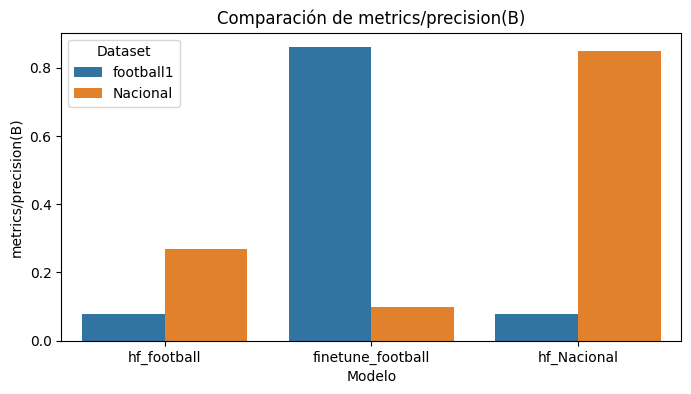

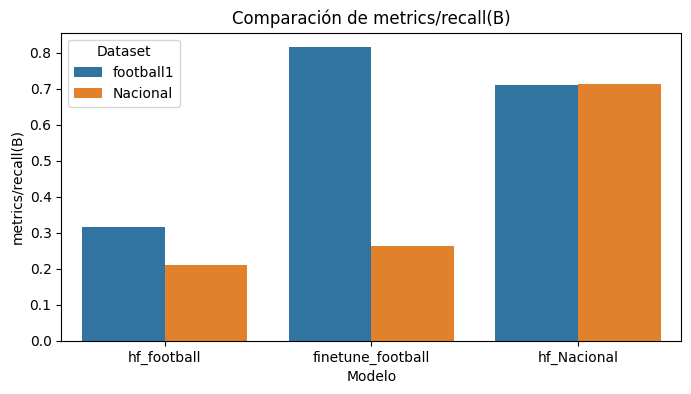

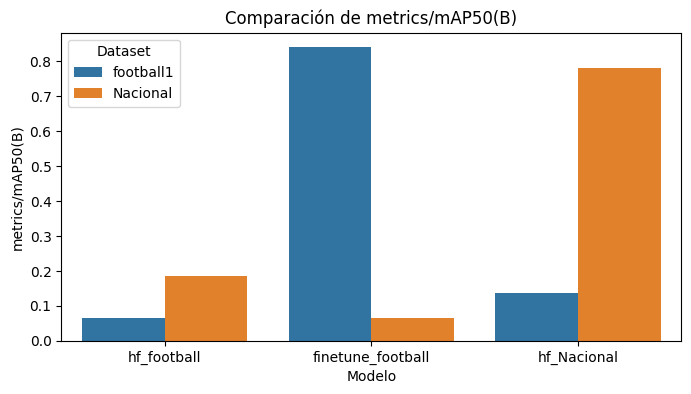

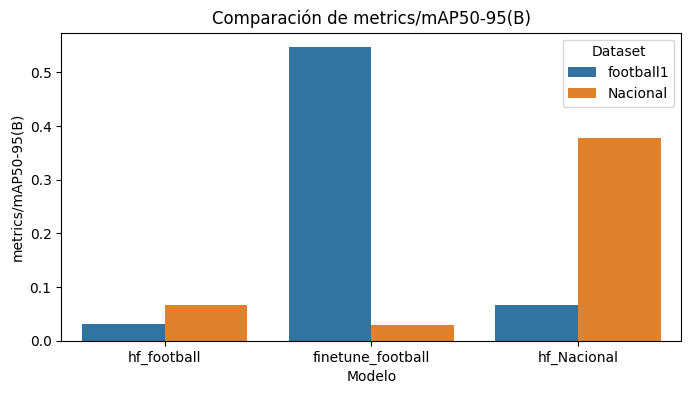

In [35]:
metrics_to_plot = [
    "metrics/precision(B)", 
    "metrics/recall(B)", 
    "metrics/mAP50(B)", 
    "metrics/mAP50-95(B)"
]

for metric in metrics_to_plot:
    plt.figure(figsize=(8,4))
    sns.barplot(data=df, x="model", y=metric, hue="dataset")
    plt.title(f"Comparación de {metric}")
    plt.ylabel(metric)
    plt.xlabel("Modelo")
    plt.legend(title="Dataset")
    plt.show()

# Predecir

In [24]:
model = YOLO(MODELS["hf_football"])
results = model.predict(source=str(DATASETS_DIR / "football1/test/images"), save=True)


image 1/126 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\football1\test\images\40cd38_7_6_png_jpg.rf.50f66d3a35b5a9e3588220a428eddc2f.jpg: 800x800 1 goalkeeper, 20 players, 2 referees, 478.9ms
image 2/126 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\football1\test\images\42ba34_1_5_png_jpg.rf.1b7af80cc1909948338dbb43811fc28f.jpg: 800x800 1 goalkeeper, 22 players, 2 referees, 315.9ms
image 3/126 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\football1\test\images\42ba34_5_5_png_jpg.rf.3c0f38315774c3cccbc0d93d3672086b.jpg: 800x800 1 goalkeeper, 22 players, 1 referee, 265.5ms
image 4/126 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\football1\test\images\42ba34_5_5_png_jpg.rf.70e9f84345dac76fea0842904768d151.jpg: 800x800 1 goalkeeper, 22 players, 1 referee, 255.2ms
image 5/126 C:\Users\Administrator\Docume

In [25]:
model = YOLO(MODELS["finetune_football"])
results = model.predict(source=str(DATASETS_DIR / "football1/test/images"), save=True)


image 1/126 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\football1\test\images\40cd38_7_6_png_jpg.rf.50f66d3a35b5a9e3588220a428eddc2f.jpg: 640x640 1 referee, 20 players, 201.3ms
image 2/126 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\football1\test\images\42ba34_1_5_png_jpg.rf.1b7af80cc1909948338dbb43811fc28f.jpg: 640x640 1 goalkeeper, 1 ball, 2 referees, 23 players, 169.9ms
image 3/126 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\football1\test\images\42ba34_5_5_png_jpg.rf.3c0f38315774c3cccbc0d93d3672086b.jpg: 640x640 1 goalkeeper, 1 referee, 19 players, 179.5ms
image 4/126 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\football1\test\images\42ba34_5_5_png_jpg.rf.70e9f84345dac76fea0842904768d151.jpg: 640x640 1 goalkeeper, 1 referee, 19 players, 175.7ms
image 5/126 C:\Users\Administrator\Documents\Mae

In [26]:
model = YOLO(MODELS["hf_football"])
results = model.predict(source=str(DATASETS_DIR / "Nacional1/test/images"), save=True)


image 1/345 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional1\test\images\-_jpg.rf.be8397dad24ca861579c867dfb3d5255.jpg: 800x800 6 players, 1 referee, 272.7ms
image 2/345 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional1\test\images\-_jpg.rf.d38ae0d83d1763dd46eee4a2a96486e4.jpg: 800x800 1 goalkeeper, 19 players, 239.9ms
image 3/345 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional1\test\images\Captura-de-pantalla-2025-11-14-191218_jpg.rf.132e2a7bac0210f9b3535bb546872b80.jpg: 800x800 9 players, 256.5ms
image 4/345 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional1\test\images\Captura-de-pantalla-2025-11-14-191259_jpg.rf.d2e4b2cb62de666c2523b1d4b58dad17.jpg: 800x800 5 players, 1 referee, 248.3ms
image 5/345 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto F

In [27]:
model = YOLO(MODELS["finetune_football"])
results = model.predict(source=str(DATASETS_DIR / "Nacional1/test/images"), save=True)


image 1/345 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional1\test\images\-_jpg.rf.be8397dad24ca861579c867dfb3d5255.jpg: 640x640 1 ball, 4 players, 204.3ms
image 2/345 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional1\test\images\-_jpg.rf.d38ae0d83d1763dd46eee4a2a96486e4.jpg: 640x640 1 ball, 15 players, 197.7ms
image 3/345 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional1\test\images\Captura-de-pantalla-2025-11-14-191218_jpg.rf.132e2a7bac0210f9b3535bb546872b80.jpg: 640x640 13 players, 196.4ms
image 4/345 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional1\test\images\Captura-de-pantalla-2025-11-14-191259_jpg.rf.d2e4b2cb62de666c2523b1d4b58dad17.jpg: 640x640 14 players, 200.6ms
image 5/345 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Naci

In [14]:
model = YOLO(MODELS["finetune_Nacional"])
results = model.predict(source=str(DATASETS_DIR / "Nacional1/test/images"), save=True)


image 1/345 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional1\test\images\-_jpg.rf.be8397dad24ca861579c867dfb3d5255.jpg: 640x640 1 Ball, 4 Players, 310.9ms
image 2/345 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional1\test\images\-_jpg.rf.d38ae0d83d1763dd46eee4a2a96486e4.jpg: 640x640 2 Balls, 2 Goalkeepers, 15 Players, 194.0ms
image 3/345 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional1\test\images\Captura-de-pantalla-2025-11-14-191218_jpg.rf.132e2a7bac0210f9b3535bb546872b80.jpg: 640x640 13 Players, 166.3ms
image 4/345 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional1\test\images\Captura-de-pantalla-2025-11-14-191259_jpg.rf.d2e4b2cb62de666c2523b1d4b58dad17.jpg: 640x640 15 Players, 163.4ms
image 5/345 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Fin

In [15]:
model = YOLO(MODELS["hf_Nacional"])
results = model.predict(source=str(DATASETS_DIR / "Nacional1/test/images"), save=True)


image 1/345 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional1\test\images\-_jpg.rf.be8397dad24ca861579c867dfb3d5255.jpg: 640x640 1 Ball, 5 Players, 201.1ms
image 2/345 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional1\test\images\-_jpg.rf.d38ae0d83d1763dd46eee4a2a96486e4.jpg: 640x640 17 Players, 1 Referee, 174.4ms
image 3/345 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional1\test\images\Captura-de-pantalla-2025-11-14-191218_jpg.rf.132e2a7bac0210f9b3535bb546872b80.jpg: 640x640 13 Players, 3 Referees, 174.2ms
image 4/345 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional1\test\images\Captura-de-pantalla-2025-11-14-191259_jpg.rf.d2e4b2cb62de666c2523b1d4b58dad17.jpg: 640x640 13 Players, 2 Referees, 169.2ms
image 5/345 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\P

# Pruebas Rapidas de Concepto 

In [ ]:
model = YOLO(MODELS["hf_football"])

results = model.predict(
    source="image/prueba9.jpg",
    conf=0.35,
    save=False
)

out_dir = BASE_DIR / "runs_custom_vis"
out_dir.mkdir(exist_ok=True)

for i, r in enumerate(results):
    img_draw = r.plot(
        line_width=1,
        font_size=0.4,
        labels=True,
        conf=True
    )
    out_path = out_dir / f"custom_{i}.jpg"
    cv2.imwrite(str(out_path), img_draw)

print("Guardado en:", out_dir)

# Paso videos a Frames

In [ ]:
def extract_segment_frames(video_path, output_folder, start_min, start_sec, duration_sec, fps_out):

    os.makedirs(output_folder, exist_ok=True)

    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: no se pudo abrir el video.")
        return

    fps_video = cap.get(cv2.CAP_PROP_FPS)
    total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    total_duration = total_frames / fps_video if fps_video > 0 else 0

    print(f"FPS del video: {fps_video:.2f}")
    print(f"Duración total aproximada: {total_duration:.2f} s")

    # tiempo de inicio en segundos
    start_time = start_min * 60 + start_sec
    end_time = start_time + duration_sec

    if start_time >= total_duration:
        print("Error: el tiempo de inicio está más allá de la duración del video.")
        cap.release()
        return
    if end_time > total_duration:
        end_time = total_duration


    time_step = 1.0 / fps_out  

    current_time = start_time
    saved_idx = 0

    while current_time < end_time:
       
        cap.set(cv2.CAP_PROP_POS_MSEC, current_time * 1000)

        ret, frame = cap.read()
        if not ret:
            print("No se pudo leer frame en t =", current_time)
            break

        frame_name = f"frame_{saved_idx:05d}.jpg"
        frame_path = os.path.join(output_folder, frame_name)
        cv2.imwrite(frame_path, frame)

        saved_idx += 1
        current_time += time_step

    cap.release()
    print(f"Se guardaron {saved_idx} frames en '{output_folder}'.")

In [ ]:
video_path = "C:/Users/Administrator/Downloads/Clasico.mp4"
output_folder = "C:/Users/Administrator/Downloads/frames_5fps_8m00s_15s"

extract_segment_frames(
    video_path=video_path,
    output_folder=output_folder,
    start_min=8,
    start_sec=0,
    duration_sec=15,   
    fps_out=5         
)

FPS del video: 25.00
Duración total aproximada: 938.00 s
Listo! Se guardaron 76 frames en 'C:/Users/Administrator/Downloads/frames_5fps_8m00s_15s'.


# Aplico Modelo Hf_Nacional a Cada Frame

In [ ]:
def procesar_frames(model_path, input_folder, output_folder, conf=0.35):


    # carpeta destino
    os.makedirs(output_folder, exist_ok=True)


    model = YOLO(model_path)


    frames = sorted([f for f in os.listdir(input_folder) 
                     if f.lower().endswith((".jpg", ".png"))])

    print(f"Encontrados {len(frames)} frames.")

    for i, frame_name in enumerate(frames):
        frame_path = os.path.join(input_folder, frame_name)


        results = model.predict(
            source=frame_path,
            conf=conf,
            save=False
        )

        img_draw = results[0].plot(
            line_width=2,
            font_size=0.5,
            labels=True,
            conf=True
        )


        out_path = os.path.join(output_folder, frame_name)
        cv2.imwrite(out_path, img_draw)

        if i % 50 == 0:
            print(f"Procesado: {i}/{len(frames)}")

    print("\nImágenes procesadas guardadas en:", output_folder)

In [ ]:
model_path = str(MODELS["hf_Nacional"])   

input_folder = r"C:\Users\Administrator\Downloads\frames_5fps_8m00s_15s"        
output_folder = r"C:\Users\Administrator\Downloads\frames_8m00s_detect" 

procesar_frames(model_path, input_folder, output_folder, conf=0.35)

Encontrados 76 frames.

image 1/1 C:\Users\Administrator\Downloads\frames_5fps_8m00s_15s\frame_00000.jpg: 384x640 8 Players, 2 Referees, 167.5ms
Speed: 1.9ms preprocess, 167.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
Procesado: 0/76

image 1/1 C:\Users\Administrator\Downloads\frames_5fps_8m00s_15s\frame_00001.jpg: 384x640 10 Players, 110.1ms
Speed: 1.3ms preprocess, 110.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 C:\Users\Administrator\Downloads\frames_5fps_8m00s_15s\frame_00002.jpg: 384x640 1 Ball, 8 Players, 113.1ms
Speed: 1.2ms preprocess, 113.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 C:\Users\Administrator\Downloads\frames_5fps_8m00s_15s\frame_00003.jpg: 384x640 7 Players, 1 Referee, 111.4ms
Speed: 1.1ms preprocess, 111.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 C:\Users\Administrator\Downloads\frames_5fps_8m00s_15s\frame_00004.jpg: 384x640 7 Play

# Generar el Video a partir de Frames

In [ ]:
def frames_a_video(input_folder, output_video_path, fps=25):
    input_folder = Path(input_folder)
    output_video_path = Path(output_video_path)

    print("Carpeta de entrada:", input_folder)
    print("Video de salida esperado en:", output_video_path)

 
    if not input_folder.exists():
        print("ERROR: La carpeta de entrada NO existe.")
        return


    image_files = sorted([
        f for f in input_folder.iterdir()
        if f.suffix.lower() in [".jpg", ".jpeg", ".png"]
    ])

    print(f"Imágenes encontradas: {len(image_files)}")
    if not image_files:
        print("ERROR: No se encontraron imágenes (.jpg/.jpeg/.png) en la carpeta.")
        return


    frame0 = cv2.imread(str(image_files[0]))
    if frame0 is None:
        print("ERROR: No se pudo leer la primera imagen:", image_files[0])
        return

    height, width, _ = frame0.shape
    frame_size = (width, height)
    print(f"Resolución del video: {frame_size}, FPS: {fps}")

    
    fourcc = cv2.VideoWriter_fourcc(*"mp4v")  
    out = cv2.VideoWriter(str(output_video_path), fourcc, float(fps), frame_size)

    if not out.isOpened():
        print("ERROR: El VideoWriter NO se pudo abrir. Revisa codec/ruta/extensión.")
        return


    for i, img_path in enumerate(image_files):
        frame = cv2.imread(str(img_path))
        if frame is None:
            print(f"Advertencia: no se pudo leer {img_path}, se salta.")
            continue

        if frame.shape[1] != width or frame.shape[0] != height:
            frame = cv2.resize(frame, frame_size)

        out.write(frame)

        if i % 50 == 0:
            print(f"Escribiendo frame {i+1}/{len(image_files)}")

    out.release()
    print("Video guardado en:", output_video_path)



In [1]:
input_folder = r"C:\Users\Administrator\Downloads\frames_8m00s_detect"
output_video = r"C:\Users\Administrator\Downloads\video_detectado_8m00s.mp4"

frames_a_video(input_folder, output_video, fps=5)

NameError: name 'frames_a_video' is not defined